In [10]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score

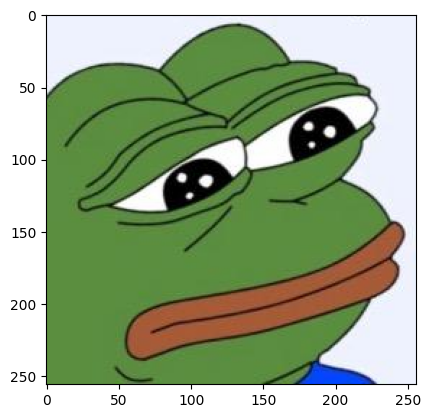

In [11]:
img = cv2.cvtColor(cv2.imread("../data/PepeTheFrog.jpg"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

In [12]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img, np.uint8)
    t = out.copy()
    # draw circle
    vec[2] = np.abs(vec[2])
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(t)
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    return np.sum(np.abs(np.subtract(img,t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.3], out, img) #X,Y,r,R,G,B,alpha

25549059

In [13]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out, np.uint8)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(out)
        plt.show()

In [14]:
w,h,c = img.shape

bounds = [
    [0,w],# x
    [0,h], # y
    [5, (w + h)//4], # radius
    [0,255], # R
    [0,255], # G
    [0,255], # B
    [0.6,1], # alpha
]

nIter = 100

# Our Differential Evolution

In [15]:
from differential_evolution import differential_evolution

0 {'P': array([178.9044207 , 157.28690383, 394.22865677,  87.05736105,
       133.24338108, 338.90310594,   0.97720674]), 'nIt': 800, 'fun': 14041983, 'nFev': 12015}


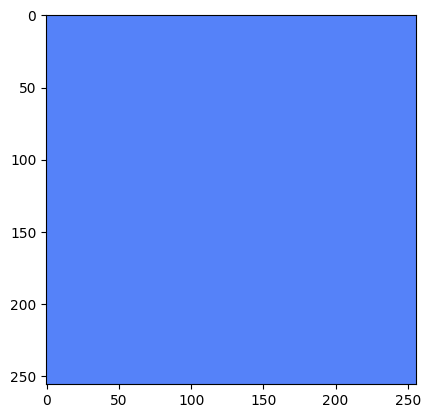

20 {'P': array([173.11790814,  53.47339315,  20.41529671,  77.29864988,
       113.33188543, 884.80131941,   1.00508912]), 'nIt': 800, 'fun': 7874015, 'nFev': 12015}


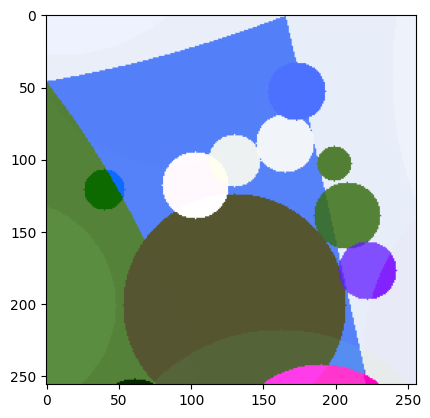

40 {'P': array([105.62365543,  67.46413416,   5.93719536, 174.39788837,
       240.04684073,  48.23397866,  -0.85014078]), 'nIt': 800, 'fun': 6953584, 'nFev': 12015}


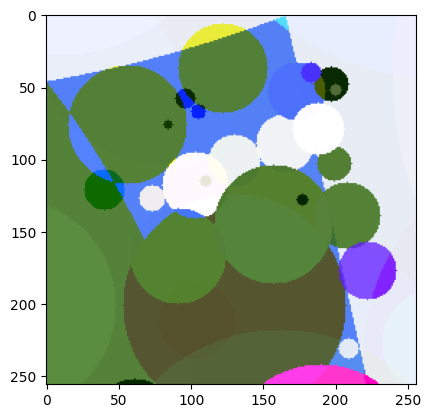

60 {'P': array([  81.35515635, -126.35729083,   74.88470357,  146.1144874 ,
        -12.99127693,   14.7849869 ,    1.04432456]), 'nIt': 800, 'fun': 6610962, 'nFev': 12015}


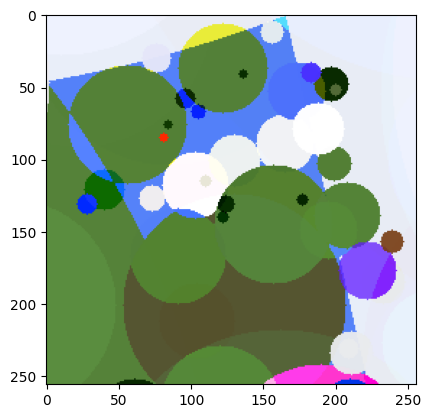

80 {'P': array([6.06951053e+01, 1.29566545e+02, 3.37670035e+00, 2.96763649e+02,
       1.63146972e+03, 2.44591475e+02, 9.39467348e-01]), 'nIt': 800, 'fun': 6454678, 'nFev': 12015}


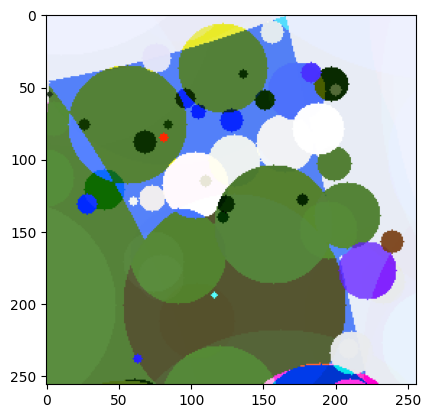

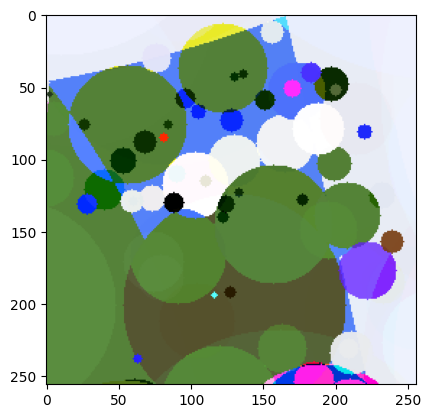

In [16]:
out = np.zeros_like(img)
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=75, cR = 0.4, nGen = 800) #The smaller cR is, it takes less risks
    if i % (nIter // np.min((nIter, 5))): 
        draw_circle(r["P"], out)
    else:
        print(i, r)
        draw_circle(r["P"], out, True)
plt.imshow(out)

# Scipy Differential Evolution

In [17]:
from scipy.optimize import differential_evolution

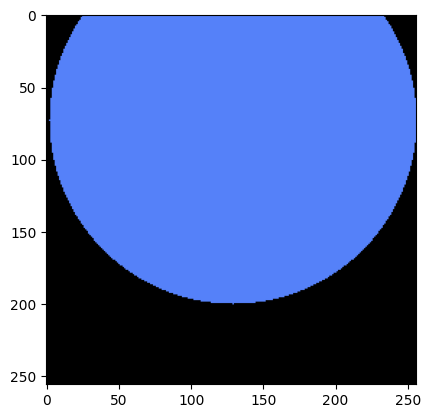

0      fun: 17811853.0
 message: 'Optimization terminated successfully.'
    nfev: 32908
     nit: 46
 success: True
       x: array([129.35230253,  73.11291533, 127.49443323,  85.61365799,
       130.35909751, 251.09424548,   0.99297199])


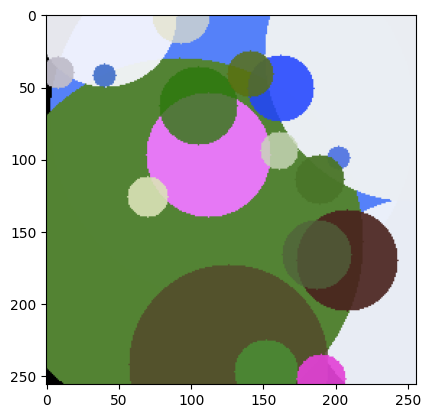

20      fun: 8366322.0
 message: 'Optimization terminated successfully.'
    nfev: 5608
     nit: 7
 success: True
       x: array([190.70937799, 252.6439645 ,  17.66331561, 226.97488045,
        65.83387408, 214.85496077,   0.91799973])


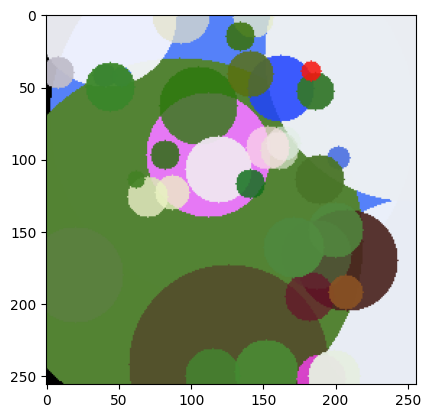

40      fun: 7795351.0
 message: 'Optimization terminated successfully.'
    nfev: 15408
     nit: 21
 success: True
       x: array([ 20.21268855, 180.40637725,  33.8667226 ,  94.28923108,
       126.19866548,  68.70357137,   0.60493001])


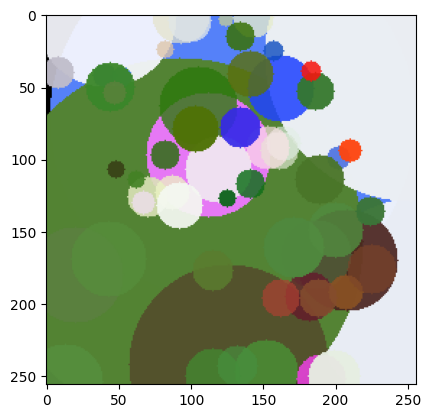

60      fun: 7522359.0
 message: 'Optimization terminated successfully.'
    nfev: 16808
     nit: 23
 success: True
       x: array([ 13.54043823, 254.73508097,  26.76719391,  84.5280561 ,
       140.81276503,  59.68877127,   0.96155345])


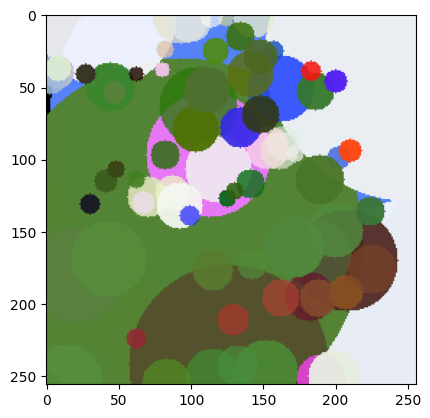

80      fun: 7324565.0
 message: 'Optimization terminated successfully.'
    nfev: 6308
     nit: 8
 success: True
       x: array([27.61920322, 41.35476718,  7.91808215, 56.42753538, 50.02120522,
       34.01747189,  0.98245769])


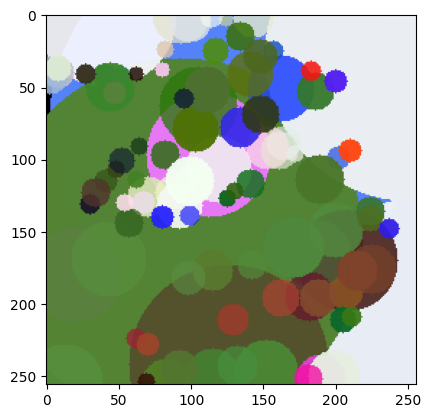

In [18]:
out = np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img), popsize= 100)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // np.min((nIter, 5))): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.